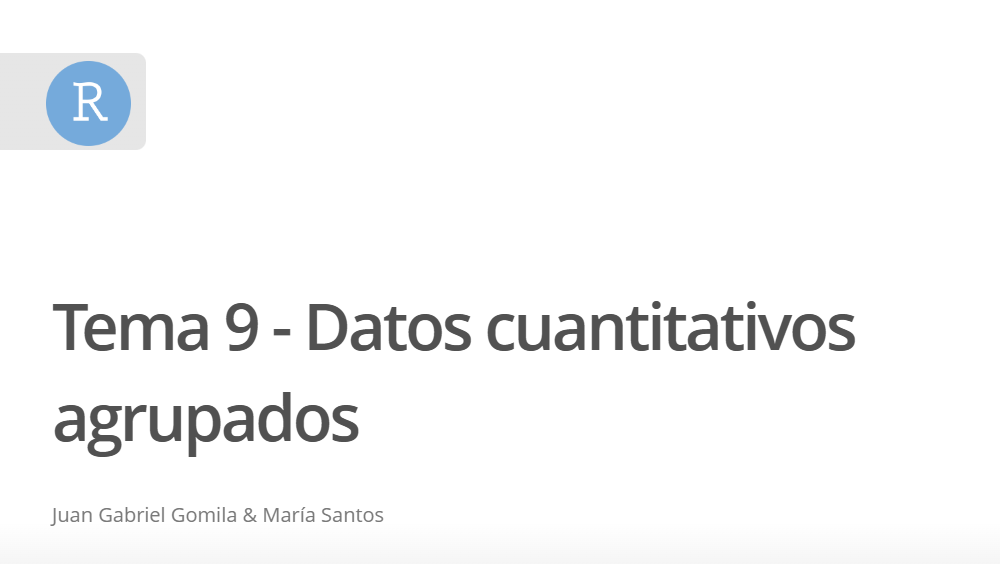

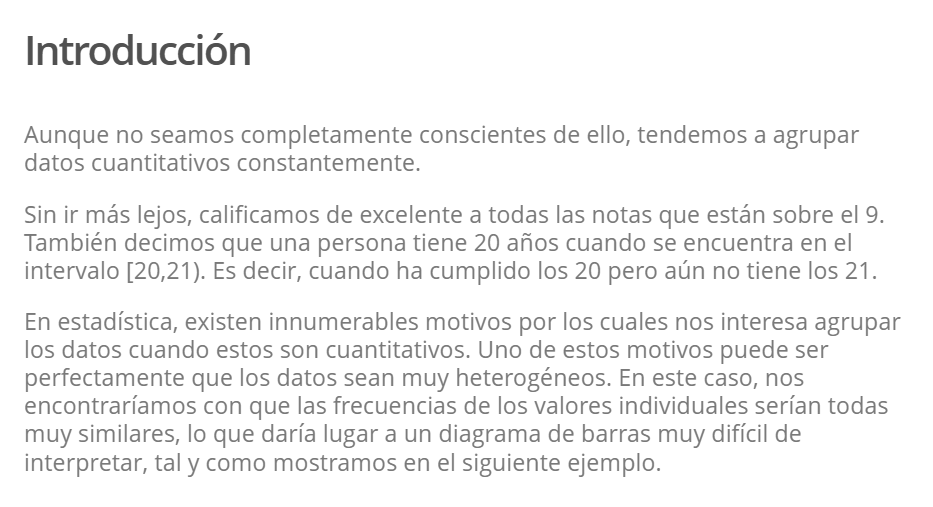

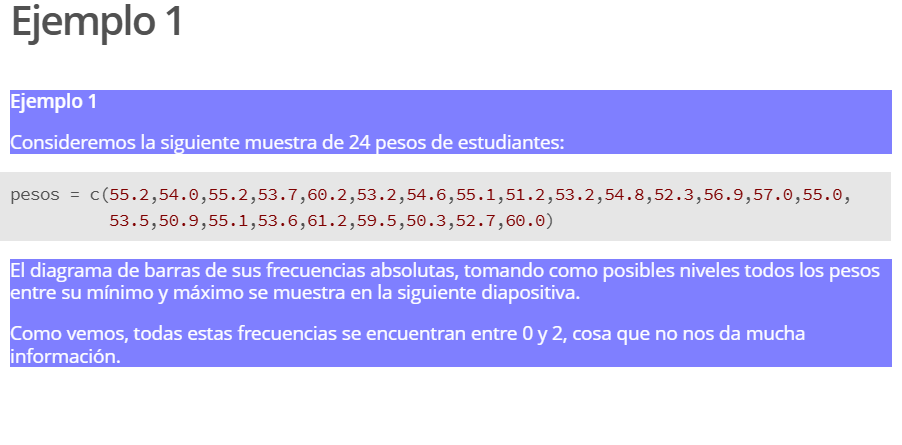

In [2]:
pesos = c(55.2,54.0,55.2,53.7,60.2,53.2,54.6,55.1,51.2,53.2,54.8,52.3,56.9,57.0,55.0,
          53.5,50.9,55.1,53.6,61.2,59.5,50.3,52.7,60.0)
pesos

[1] 55.2 54.0 55.2 53.7 60.2 53.2 54.6 55.1 51.2 53.2 54.8 52.3 56.9 57.0 55.0
[16] 53.5 50.9 55.1 53.6 61.2 59.5 50.3 52.7 60.0

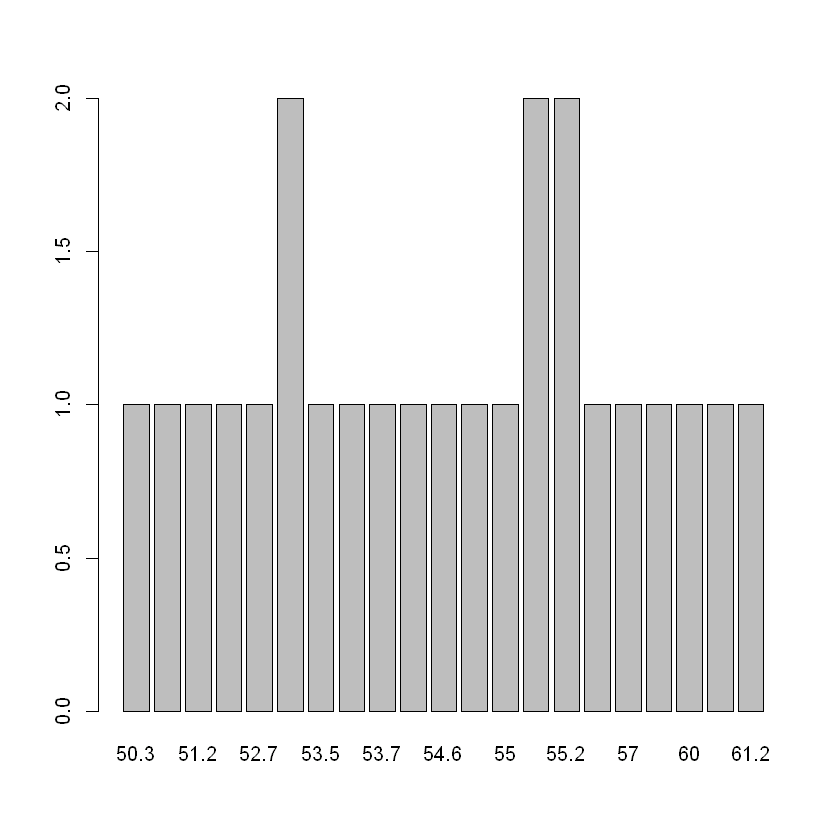

In [3]:
barplot(table(pesos)) #grafico de barras de frecuencia absoluta

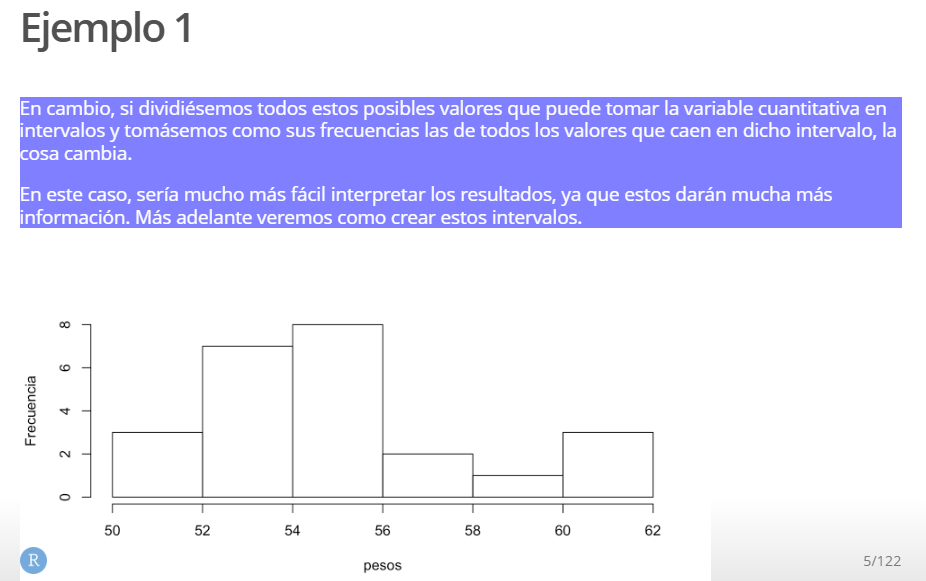

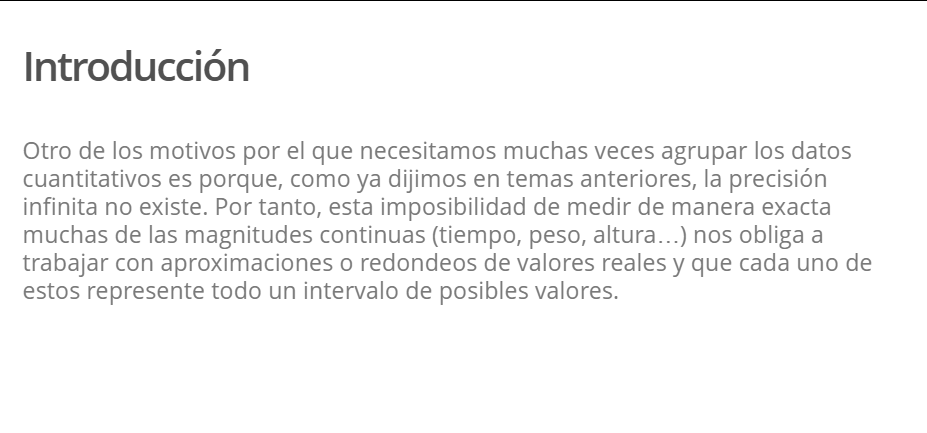

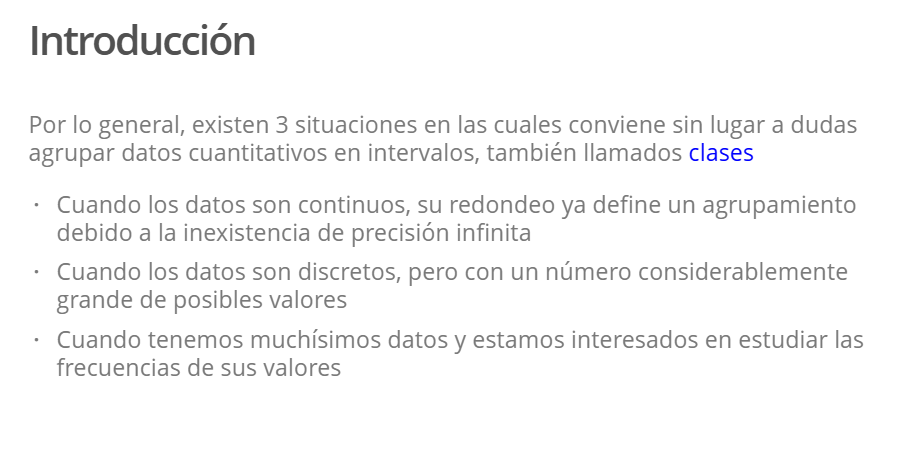

## Como agrupar datos:

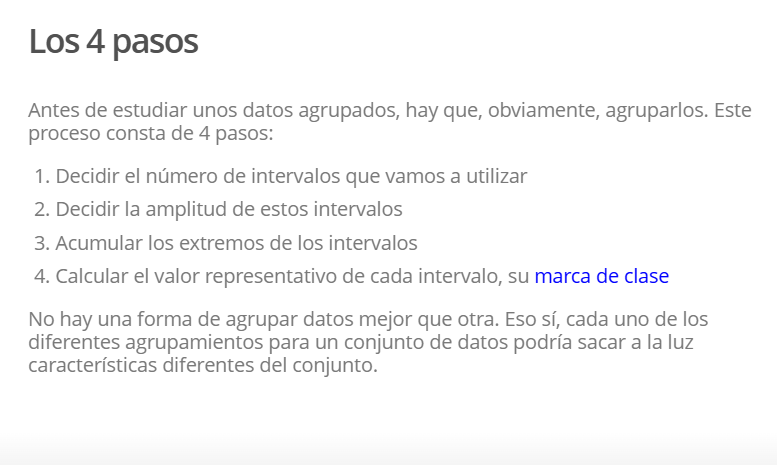

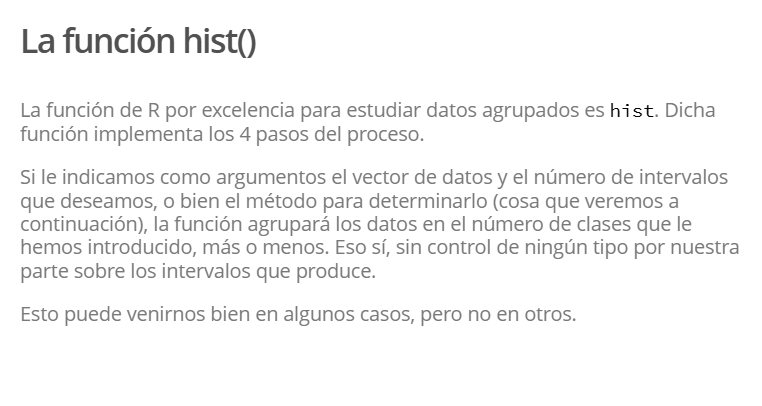

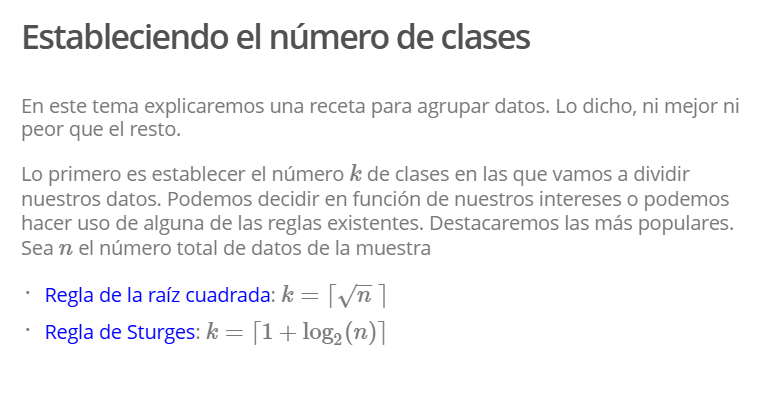

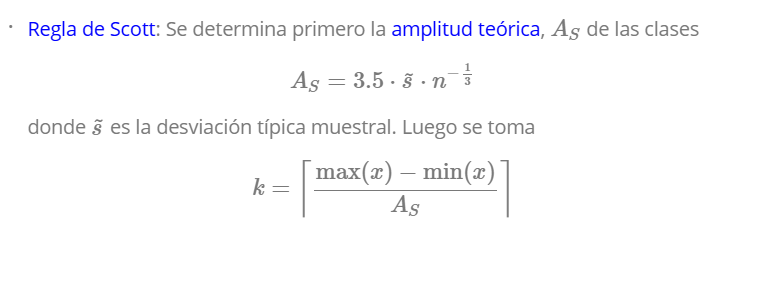

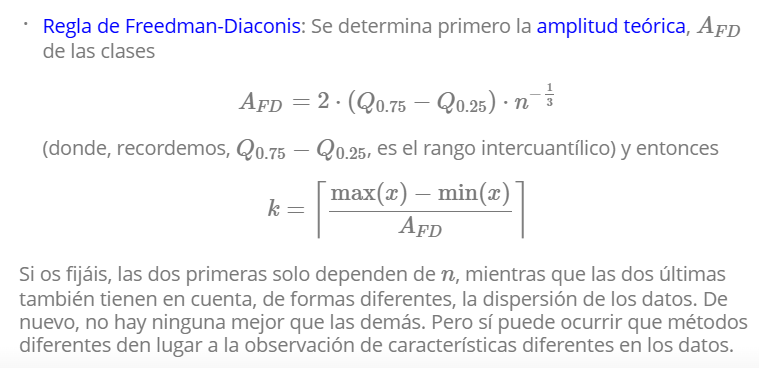

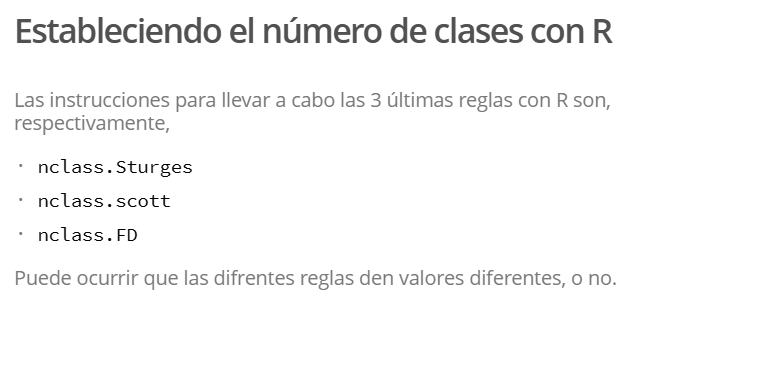

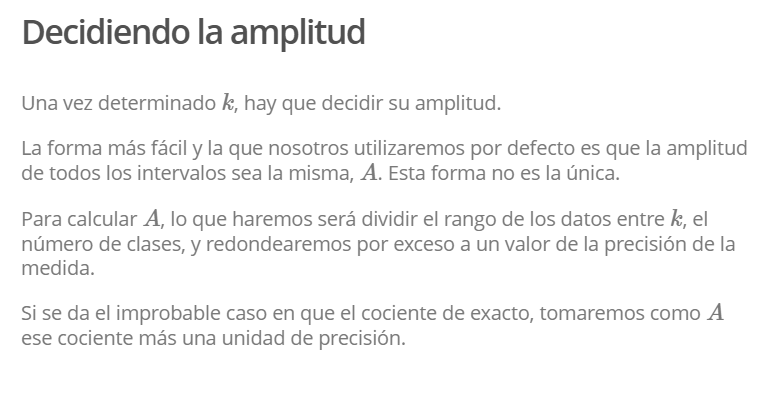

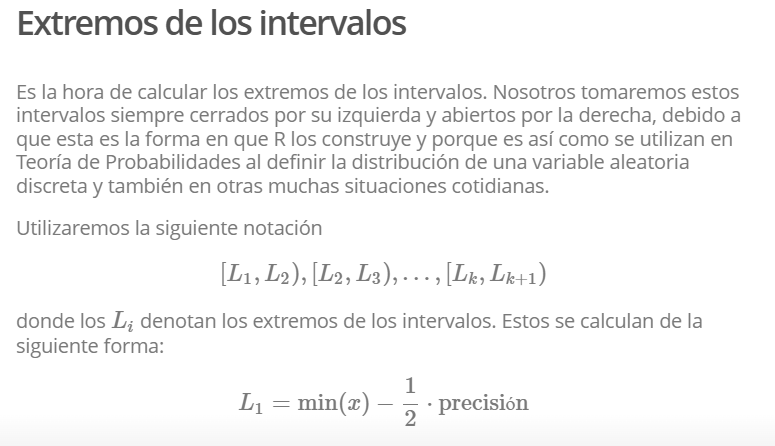

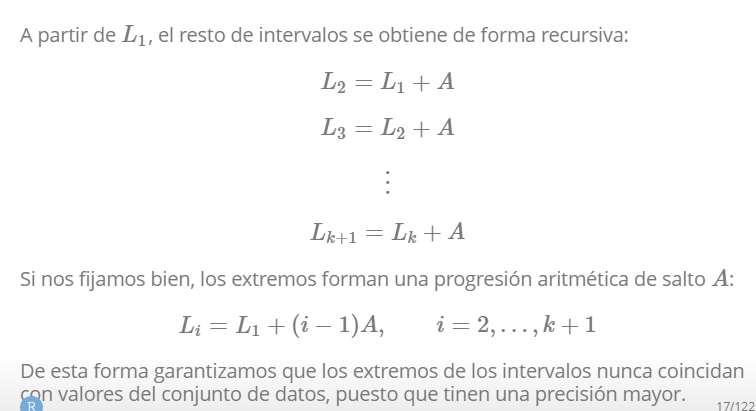

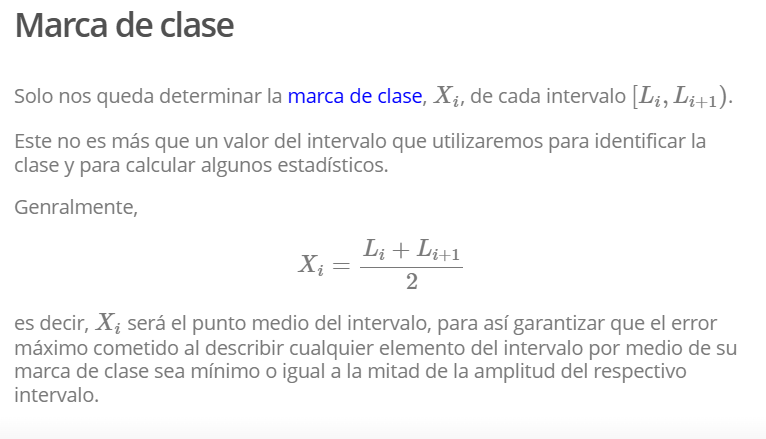

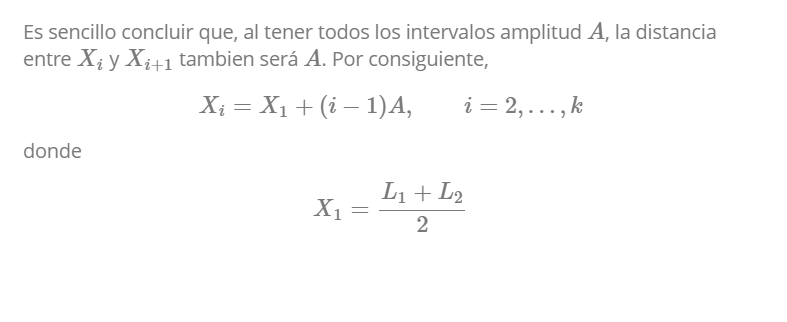

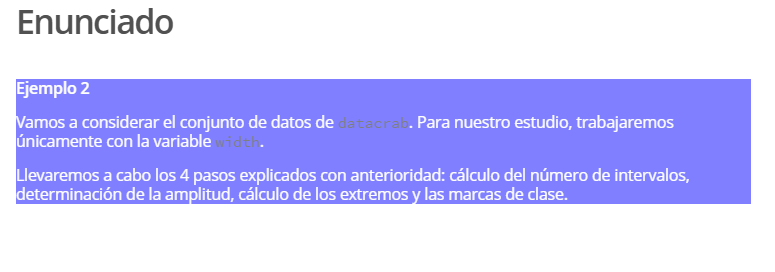

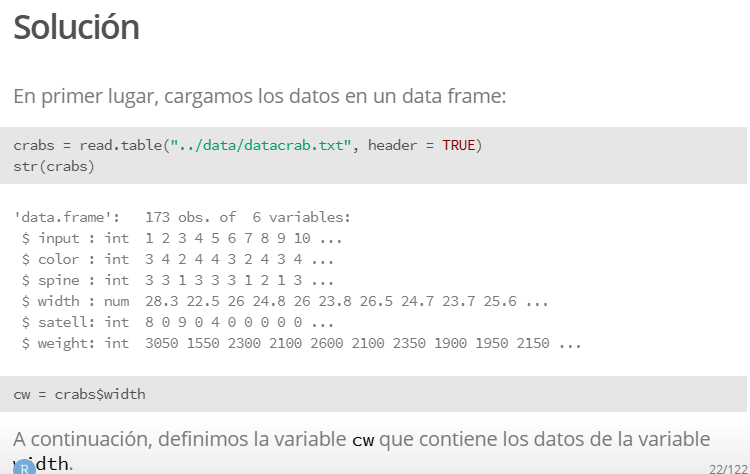

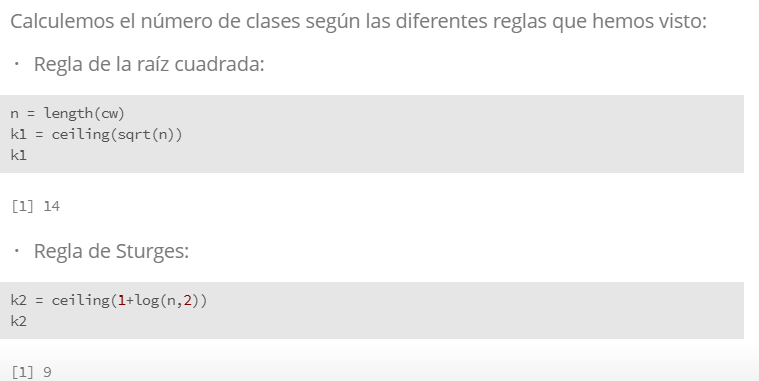

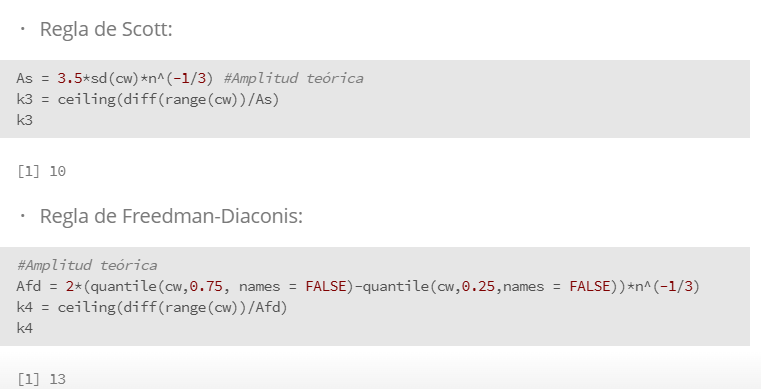

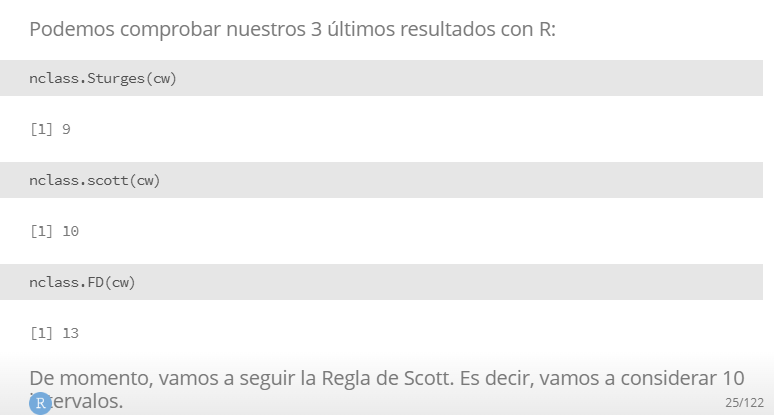

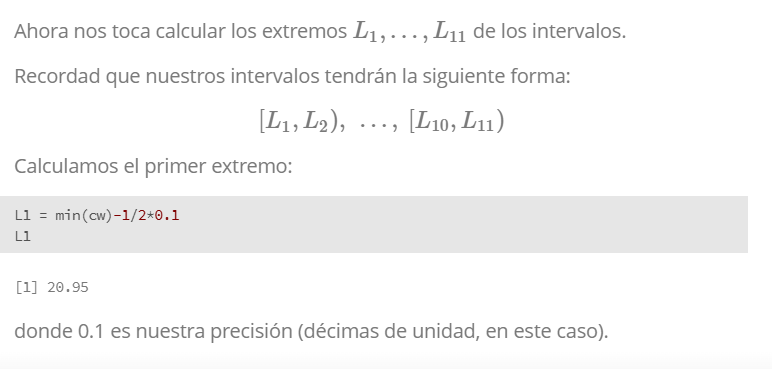

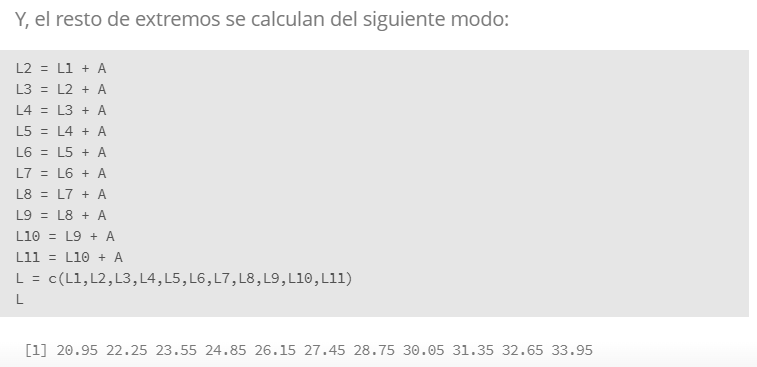

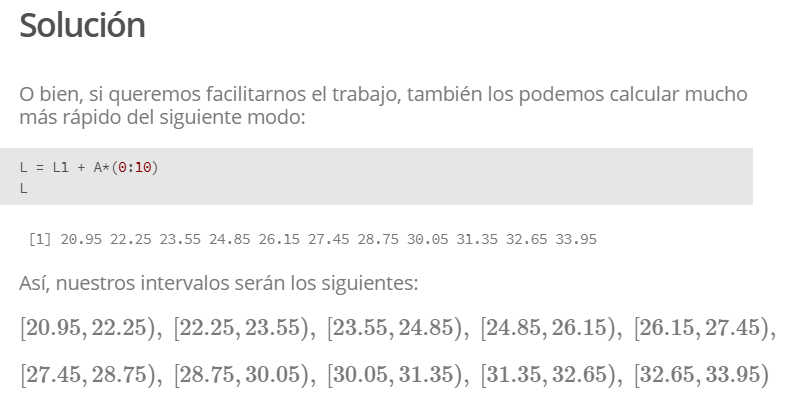

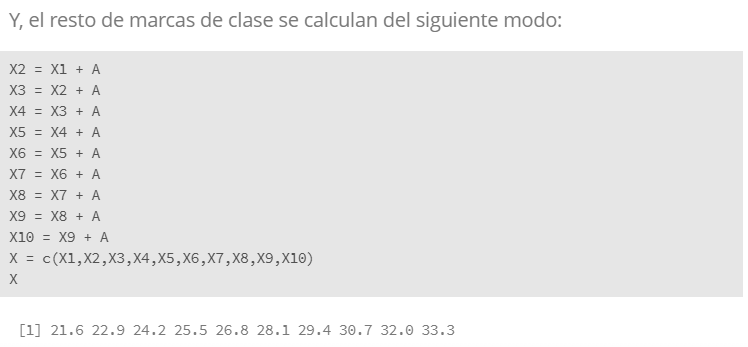

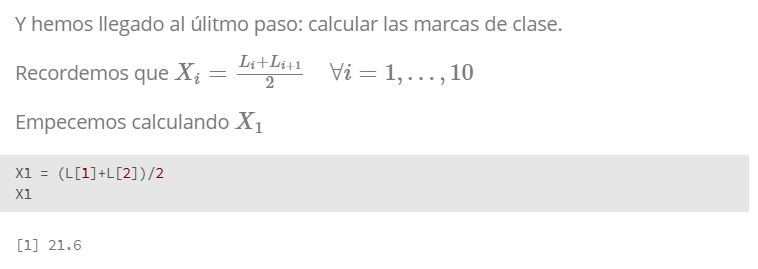

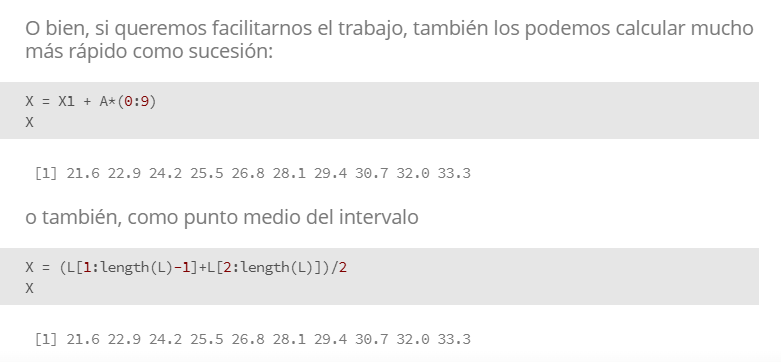

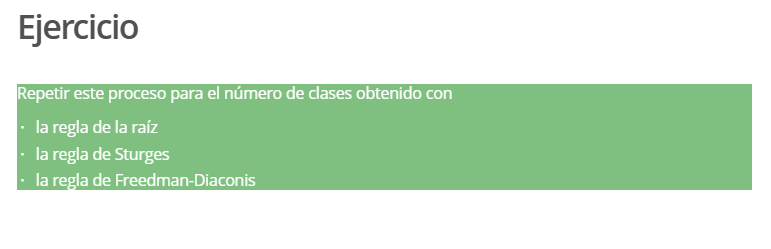

## Solucion ejercicio 2

In [4]:
crabs = read.table("base de datos/datacrab.txt", header = TRUE)
str(crabs)

'data.frame':	173 obs. of  6 variables:
 $ input : int  1 2 3 4 5 6 7 8 9 10 ...
 $ color : int  3 4 2 4 4 3 2 4 3 4 ...
 $ spine : int  3 3 1 3 3 3 1 2 1 3 ...
 $ width : num  28.3 22.5 26 24.8 26 23.8 26.5 24.7 23.7 25.6 ...
 $ satell: int  8 0 9 0 4 0 0 0 0 0 ...
 $ weight: int  3050 1550 2300 2100 2600 2100 2350 1900 1950 2150 ...


In [8]:
cw = crabs$width # variable que contiene datos de la variable width


### Elegir el numero de intervalos:

In [21]:
# Regla de la raiz cuadrada:
n = length(cw)
k1 = ceiling(sqrt(n))  #ceiling(x): es una función que devuelve el entero más pequeño mayor o igual que x
k1

[1] 14

In [10]:
# Regla de Sturges:
k2 = ceiling(1+log(n,2))
k2

[1] 9

In [23]:
#Comprobando los resultados obtenidos:
nclass.Sturges(cw)

[1] 9

In [11]:
# Regla de Scott:
As = 3.5*sd(cw)*n^(-1/3) #Amplitud teórica
k3 = ceiling(diff(range(cw))/As)
k3

[1] 10

In [24]:
#Comprobando los resultados obtenidos:
nclass.scott(cw)

[1] 10

In [12]:
# Regla de Freedman-Diaconis:
#Amplitud teórica
Afd = 2*(quantile(cw,0.75, names = FALSE)-quantile(cw,0.25,names = FALSE))*n^(-1/3) 
k4 = ceiling(diff(range(cw))/Afd)
k4

[1] 13

In [26]:
#Comprobando los resultados obtenidos:
nclass.FD(cw)

[1] 13

### Elegir la amplitud de los intervalos:

In [13]:
A = diff(range(cw)) / 10
A

[1] 1.25

In [ ]:
#Como nuestros datos están expresados en mm con una precisión de una cifra decimal
# debemos redondear por exceso a un cifra decimal el resultado obtenido. 

A = 1.3
#Recordad que si el cociente nos hubiera dado un valor exacto con respecto a la 
#precisión, tendríamos que haberle sumado una unidad de precisión.

### Calcular los extremos:

In [14]:
# primer extremo:
L1 = min(cw)-1/2*0.1 #donde 0.1 es nuestra precisión (décimas de unidad, en este caso).
L1

[1] 20.95

In [15]:
# Calculamos el resto de extremos de intervalos:
L2 = L1 + A
L3 = L2 + A
L4 = L3 + A
L5 = L4 + A
L6 = L5 + A
L7 = L6 + A
L8 = L7 + A
L9 = L8 + A
L10 = L9 + A
L11 = L10 + A
L = c(L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11)
L

[1] 20.95 22.20 23.45 24.70 25.95 27.20 28.45 29.70 30.95 32.20 33.45

In [16]:
# otra forma mas rapida de calcular los intervalos:
L = L1 + A*(0:10)
L

[1] 20.95 22.20 23.45 24.70 25.95 27.20 28.45 29.70 30.95 32.20 33.45

### Calcular las marcas de clase:

In [17]:
X1 = (L[1]+L[2])/2
X1

[1] 21.575

In [18]:
# El resto de marcas de clase:
X2 = X1 + A
X3 = X2 + A
X4 = X3 + A
X5 = X4 + A
X6 = X5 + A
X7 = X6 + A
X8 = X7 + A
X9 = X8 + A
X10 = X9 + A
X = c(X1,X2,X3,X4,X5,X6,X7,X8,X9,X10)
X

[1] 21.575 22.825 24.075 25.325 26.575 27.825 29.075 30.325 31.575 32.825

In [19]:
# mas rapido:
X = X1 + A*(0:9)
X

[1] 21.575 22.825 24.075 25.325 26.575 27.825 29.075 30.325 31.575 32.825

In [20]:
# otra forma de calcular el punto medio del intervalo:
X = (L[1:length(L)-1]+L[2:length(L)])/2
X

[1] 21.575 22.825 24.075 25.325 26.575 27.825 29.075 30.325 31.575 32.825